In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [5]:
df = pd.read_csv(r"C:\Users\Usuario\Desktop\PythonML\DXUds\original.csv")

In [6]:
df

,Rank,Release Date,Movie Title,Production Budget ($),Worldwide Gross ($),Domestic Gross ($)
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0


In [7]:
df = df[df["Worldwide Gross ($)"] != 0]

In [8]:
df.drop(["Rank","Release Date","Movie Title","Domestic Gross ($)"], axis=1, inplace=True)

In [9]:
df

,Production Budget ($),Worldwide Gross ($)
0,"$110,000","$11,000,000"
1,"$385,907",$0
2,"$200,000","$8,000,000"
3,"$100,000","$3,000,000"
4,"$245,000","$22,000,000"
...,...,...
5386,"$15,000,000",$0
5387,"$160,000,000",$0
5388,"$175,000,000",$0
5389,"$50,000,000",$0


In [10]:
df.rename(columns={"Production Budget ($)" : "production_budget", "Worldwide Gross ($)" : "worldwide_gross"}, inplace=True)

In [11]:
df

,production_budget,worldwide_gross
0,"$110,000","$11,000,000"
1,"$385,907",$0
2,"$200,000","$8,000,000"
3,"$100,000","$3,000,000"
4,"$245,000","$22,000,000"
...,...,...
5386,"$15,000,000",$0
5387,"$160,000,000",$0
5388,"$175,000,000",$0
5389,"$50,000,000",$0


In [12]:
cols = ["production_budget","worldwide_gross"]
df[cols] = df[cols].replace({"\$":"", ",":""}, regex=True)
df = df.astype(float)

In [13]:
df = df[df.worldwide_gross != 0]
df

,production_budget,worldwide_gross
0,110000.0,11000000.0
2,200000.0,8000000.0
3,100000.0,3000000.0
4,245000.0,22000000.0
5,3900000.0,9000000.0
...,...,...
5378,55000000.0,376856949.0
5379,40000000.0,166893990.0
5380,185000000.0,561137727.0
5381,175000000.0,140012608.0


In [14]:
df.describe()

,production_budget,worldwide_gross
count,5.034000e+03,5.034000e+03
mean,3.290784e+07,9.515685e+07
std,4.112589e+07,1.726012e+08
min,1.100000e+03,2.600000e+01
25%,6.000000e+06,7.000000e+06
50%,1.900000e+07,3.296202e+07
75%,4.200000e+07,1.034471e+08
max,4.250000e+08,2.783919e+09


In [15]:
X = pd.DataFrame(df,columns=["production_budget"])
Y = pd.DataFrame(df,columns=["worldwide_gross"])

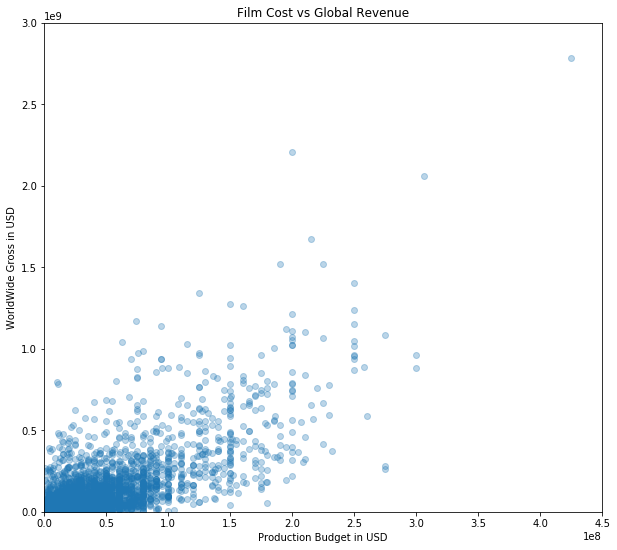

In [16]:
plt.figure(figsize=(10,9))
plt.scatter(X,Y, alpha=0.3)
plt.title("Film Cost vs Global Revenue")
plt.ylabel("WorldWide Gross in USD")
plt.xlabel("Production Budget in USD")
plt.ylim(0,3000000000)
plt.xlim(0,450000000)
plt.show()

In [19]:
regression = LinearRegression()
regression.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
regression.coef_

array([[3.11150918]])

In [21]:
regression.intercept_

array([-7236192.72913943])

In [22]:
regression.score(X,Y)

0.5496485356985727

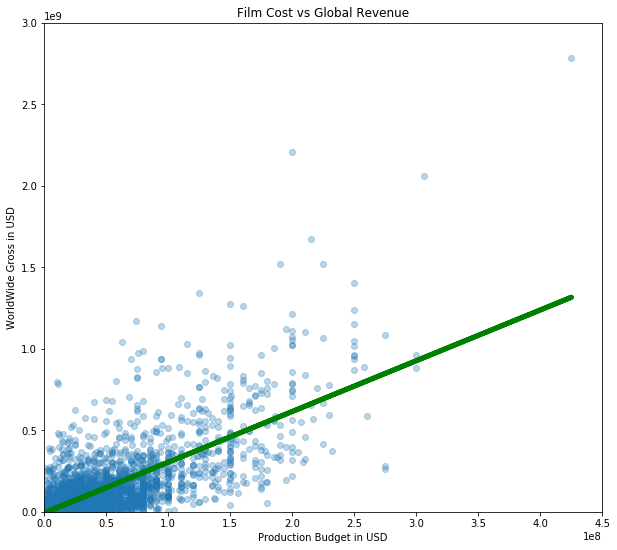

In [24]:
plt.figure(figsize=(10,9))
plt.scatter(X,Y, alpha=0.3)
plt.plot(X,regression.predict(X), color="green", LineWidth=5)
plt.title("Film Cost vs Global Revenue")
plt.ylabel("WorldWide Gross in USD")
plt.xlabel("Production Budget in USD")
plt.ylim(0,3000000000)
plt.xlim(0,450000000)
plt.show()

In [6]:
mew = 2
mew *= 3
mew

6